<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW9 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due November 18, 2024 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Fall 2024
</font>
</center>








## Your Name: Vince Verdugo

## Your ID: 826107601

## 1. Summary

Question 1: I used the Euler method to approximate the solution to the given differential equation. I then plotted the approximation and the analytical solution, and then calculated and plotted the difference. I then reapproximated the solution for different size $\Delta t$ to find how changing the value effected our results.

Question 2: I implemented the Forward Difference Scheme to derive the Fibonacci sequence, as well as utilized the Euler method to dicretize the Logistic ODE into the Logistic map. 

Question 3: given the equation I produced its numerical solution, and then substituted $Y_n = \lambda^n$ to obtain the solution in terms of $\rho$. I then produced a plot to compare the solutions. 

Question 4: I used automatic differentiation to perform the task of finding the value of $\frac{dL}{dW_1}$ using PyTorch

## 2. Methodology

For question 1 and 3, I implemented different functions from the <code>numpy</code> and <code>matplotlib.pyplot</code> packages to calculate the different functions and plot the results. To produce functions with the Euler method and given Eq (4), I implemented <code>for</code> loops to $n+1$ write values given $n$. For question 2 I used markdown. For question 4, I imported <code>torch</code> and used the <code>tensor</code> and <code>autograd.grad</code> functions to calculate the value of the partial derivative. 

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Results for Question 1

Given the differenital equation
$$ \frac{dy}{dt} = \sigma y , \, \quad y(0) = 0.01 $$

With $\Delta t = 0.001$, we will use the Euler method to solve our given equation

Referencing lecture slides, we will use the approximation
$$y_{j+1} = y_j + \Delta t f_j $$

Which in the context of our equation
$$y_{j+1} = y_j + \Delta t (\sigma t_j)$$
so for $j = 0, \Delta t = 0.001, \sigma = 0.2$ 
$$y_{1} = 0.01*0.001(0.02*y_0)$$

#### 1a

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Define parameters
dt = 0.001
t = np.arange(0,10+dt,dt)
sigma = 0.2
y0 = 0.01
#Create function array that is same size as domain
y = np.zeros(len(t)) #Will add correct values
#Initial condition
y[0] = y0

#Calculate values of y using Euler method
for i in range(0, len(y)-1):
    #Approximation formula
    y[i+1] = y[i] + dt*(sigma*y[i])

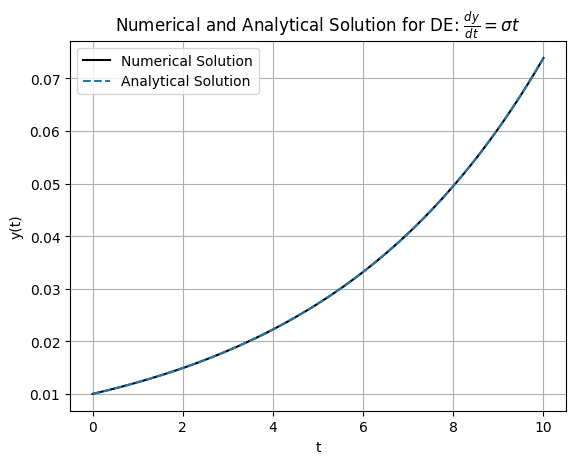

In [3]:
#Generate plot
plt.plot(t, y, 'k')
plt.plot(t, y0*np.exp(sigma*t), '--')
plt.legend(['Numerical Solution', 'Analytical Solution'])
plt.title(r'Numerical and Analytical Solution for DE: $\frac{dy}{dt} = \sigma t$')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.grid()
plt.show()

#### 1b

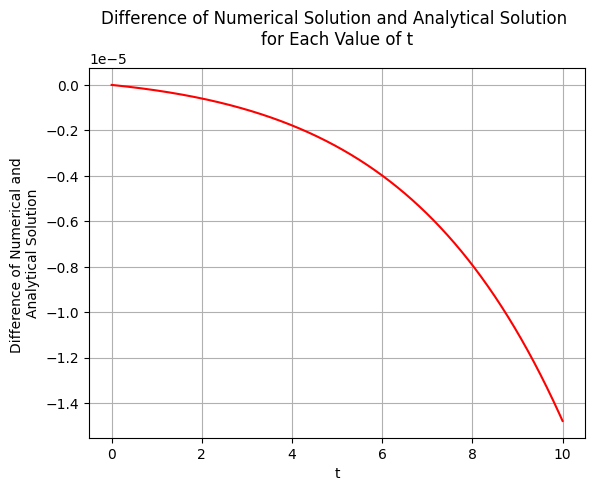

In [4]:
#Compute differences and plot
diff = y - (y0*np.exp(sigma*t))
plt.plot(t, diff, 'r')
plt.title('Difference of Numerical Solution and Analytical Solution \nfor Each Value of t')
plt.ylabel('Difference of Numerical and \nAnalytical Solution')
plt.xlabel('t')
plt.grid()
plt.show()

#### 1c

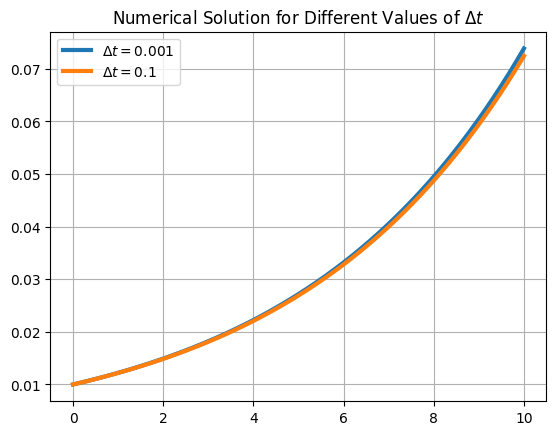

In [5]:
#Reproduce code by selecting dt = 0.1
#Define parameters
dt2 = 0.1
t2 = np.arange(0,10+dt2,dt2)
#Create function array that is same size as domain
y2 = np.zeros(len(t2)) #Will add correct values
#Initial condition
y2[0] = y0

#Calculate values of y
for i in range(0, len(y2)-1):
    #Approximation formula
    y2[i+1] = y2[i] + dt2*(sigma*y2[i])
    
#Generate plot
plt.plot(t, y, linewidth = 3)
plt.plot(t2, y2, linewidth = 3)
plt.legend([r'$\Delta t = 0.001$', r'$\Delta t = 0.1$'])
plt.title(r'Numerical Solution for Different Values of $\Delta t$')
plt.grid()
plt.show()

As we can see in the graph above, changing $\Delta t$ modified our numerical solution. Our approximation for $\Delta t = 0.1$ is less accurate due to us approximating with a significantly smaller number of points ($\Delta t$)

#### 1d

Using our numerical solution from part 1a, we will compute the growth rate as defined

$$ \frac{1}{\Delta t}\frac{y_{n+1} - y_n}{y_n} $$

In [6]:
#Determine growth rate using above formula
gr = ((y[1:] - y[:-1])/(dt*y[:-1]))
print('Growth rates for using following expression:', gr)

Growth rates for using following expression: [0.2 0.2 0.2 ... 0.2 0.2 0.2]


### Results for Question 2

#### 2a

With the given equation, $ \frac{dZ}{dt} = \sigma Z $, using the Centered Difference Scheme we can say that 

$$\frac{dZ}{dt} = \frac{Z(t + \Delta t) - Z(t - \Delta t)}{2 \Delta t} = \sigma Z $$
Substituting the values: $$ Z(t + \Delta t) = Z_{n+1} $$

$$ Z(t - \Delta t) = Z_{n-1} $$
      
We derive $$\frac{Z_{n+1}- Z_{n-1}}{2 \Delta t} = \sigma Z_n $$

Thus for $ \sigma = \frac{1}{2 \Delta t} $, we get the solution:

$$ Z_{n+1} - Z_{n-1} = Z_n $$
$$=$$
$$ Z_{n+1} = Z_{n-1} + Z_n $$

Which is our equation for the Fibonacci Sequences

#### 2b

Given the Logistic ODE:
$$ \frac{dX}{dt} = \sigma X(1-X) $$

Using the Forward Difference Scheme,

$$ \frac{dX}{dt} = \frac{X_{n+1}-X_n}{\Delta t} $$

we can rewrite the ODE above as

$$ \frac{X_{n+1}-X_n}{\Delta t} = \sigma X_n(1-X_n) $$

If we want to define $\rho$ as a function of $\sigma$ and $\Delta t$, and $Y_n$ as a function of $\sigma, \Delta t$ and $X_n$. 

Isolating the left hand side,

$$ X_{n+1}-X_n = \Delta t\sigma X_n(1-X_n) $$

then isolating the $ X_{n+1} $ term

$$ X_{n+1} = X_n + \Delta t\sigma X_n(1-X_n) $$

and rewriting as 

$$ X_{n+1} = X_n(1 + \Delta t\sigma)(1-X_n) $$

thus if we define $\rho = 1 + \Delta t\sigma$ and $Y_n = X_n$, then

$$ Y_{n+1} = \rho Y_n(1-Y_n) $$

### Results for Question 3

#### 3a

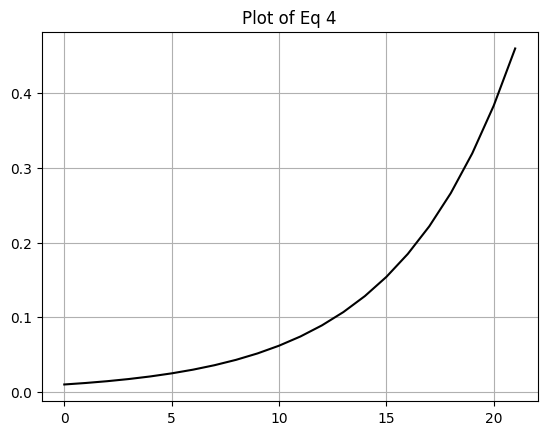

In [18]:
#Using Eq (5)
#Define parameters
#For n = 0,1,...20 --> 21 values
y = np.zeros(22) 
x = np.arange(0,22)
#Define parameters Y_0 and rho
y[0] = 0.01
rho = 1.2

for n in range(0,len(y)-1):
    y[n+1] = rho*y[n]
    
#Generate plot
plt.plot(x, y, 'k')
plt.title('Plot of Eq 4')
plt.grid()
plt.show()

#### 3b

Substituting $Y_n = \lambda^n$ into the equation:

$$ \lambda^{n+1} = \rho \lambda^n $$

Using the equation $ \lambda^n = \lambda^{n-1} + \lambda^{n-2}$ 

$$ \lambda^{n} + \lambda^{n-1} = \rho(\lambda^{n-1} + \lambda^{n-2}) $$

$$ \rho = \frac{\lambda^{n} + \lambda^{n-1}}{\lambda^{n-1} + \lambda^{n-2}} $$

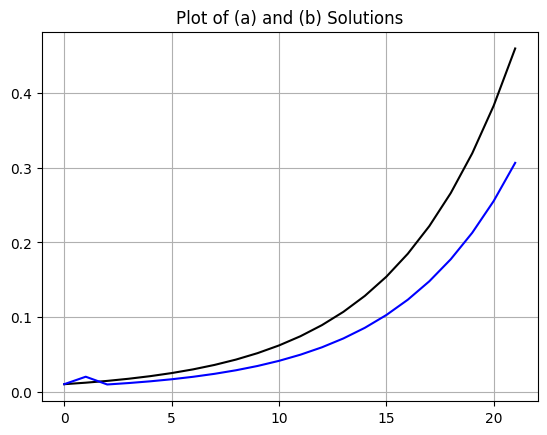

In [20]:
#Create new y array
y_new = np.zeros(22)
y_new[0] = y0
y_new[1] = y_new[0] + y0

for n in range(2, len(y_new)):
    y_new[n] = (1-rho)*y[n-1]+rho*y[n-2]
    
#Generate new plot
plt.plot(x, y, 'k')
plt.plot(x, y_new, 'b')
plt.title('Plot of (a) and (b) Solutions')
plt.grid()
plt.show()

### Results for Question 4

In [66]:
#import torch to use automatic differentiation
import torch

#Define same variables as in HW7 Q3
u = torch.tensor(0.5, requires_grad=False) #Input variable so no grad
v = torch.tensor(0.1, requires_grad=False) #Input variable so no grad
w1 = torch.tensor(0.4, requires_grad=True)
w2 = torch.tensor(0.3, requires_grad=True)
w3 = torch.tensor(0.7, requires_grad=True)
b1 = torch.tensor(0.1, requires_grad=True)
b2 = torch.tensor(0.2, requires_grad=True)
q = torch.tensor(1.0) 
learning_rate = 0.1

In [70]:
#Define functions x, a, z, q 
x = (u*w1) + (v*w2) + b1
a = x
z = (a*w3) + b2
qhat = z

#Step 2: Loss Calculation
#Mean Squared Error (MSE) Loss
L = 0.5*(q - qhat)**2

#Value of dL/dw_1
dL_dw1 = torch.autograd.grad(L, w1)[0]
print(dL_dw1)

tensor(-0.1991)


Using the <code>autograd.grad</code> function, I was able to derive a value of -0.1991, which is consistent with my value of -0.19915 from HW8 Q4

### LAMBDIFY PROBLEMS

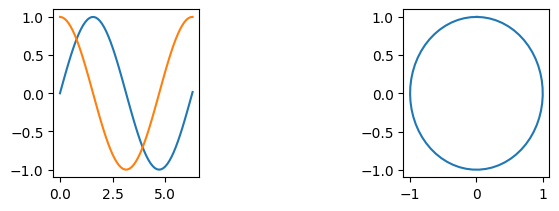

In [14]:
import sympy as sp

t = sp.Symbol('t')

x = sp.Function('x')
y = sp.Function('y')

x = sp.sin(t)
y = sp.diff(x,t)

lam_y = sp.lambdify(t,y,modules=['numpy'])
lam_x = sp.lambdify(t,x,modules=['numpy'])

dt = 0.1
t = np.arange(0,2*np.pi+dt, dt)
ynum = lam_y(t)
xnum = lam_x(t)

plt.subplot(2,3,1)
plt.plot(t, xnum)
plt.plot(t, ynum)

plt.subplot(2,3,3)
plt.plot(xnum, ynum)

plt.show()

### Ill-conditioning

In [16]:
A = np.array([[.9999, -1.0001],[1,-1]])
b = np.array([1,1]).astype(float)

sol = np.linalg.solve(A, b)
sol

array([ 0.5, -0.5])

In [20]:
eps = 1e-6
b[1] += eps

sol2 = np.linalg.solve(A, b)
sol2

array([ 0.520002, -0.480002])